# Reflector

This example shows how to use PyAEDT to create an HFSS SBR+ project from an
HFSS antenna and run a simulation.

Keywords: **HFSS**,  **SBR+**, **reflector**.

## Perform imports and define constants

Perform required imports and set up the local path to the path for the PyAEDT
directory.

In [1]:
import tempfile
import time

import ansys.aedt.core
from ansys.aedt.core.examples.downloads import download_sbr


Define constants.

In [2]:
AEDT_VERSION = "2025.2"
NUM_CORES = 4
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Download project

In [4]:
project_full_name = download_sbr(local_path=temp_folder.name)

## Define designs

Define two designs, one source and one target, with each design connected to
a different object.

In [5]:
target = ansys.aedt.core.Hfss(
    project=project_full_name,
    design="Cassegrain_",
    solution_type="SBR+",
    version=AEDT_VERSION,
    new_desktop=True,
    non_graphical=NG_MODE,
)

source = ansys.aedt.core.Hfss(
    project=target.project_name,
    design="feeder",
    version=AEDT_VERSION,
)

PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmp2kjafau6.ansys\sbr\Cassegrain.aedt.


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_b315c8ce-9a65-4a71-865d-d6c721b76e97.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmp2kjafau6.ansys\sbr\Cassegrain.aedt correctly loaded. Elapsed time: 0m 10sec


PyAEDT INFO: 2025.2 version started with process ID 7196.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Project Cassegrain has been opened.


PyAEDT INFO: Active Design set to Cassegrain_


PyAEDT INFO: Aedt Objects correctly read


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Returning found Desktop session with PID 7196!


PyAEDT INFO: Project Cassegrain set to active.


PyAEDT INFO: Active Design set to feeder


PyAEDT INFO: Aedt Objects correctly read


## Define linked antenna

Define a linked antenna. This is HFSS far field applied to HFSS SBR+.

In [6]:
target.create_sbr_linked_antenna(source, target_cs="feederPosition", field_type="farfield")

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 1sec


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Native component Linked Antenna feeder_EK28OQ has been correctly created.


feeder_EK28OQ1

## Assign boundaries

Assign boundaries.

In [7]:
target.assign_perfecte_to_sheets(["Reflector", "Subreflector"])
target.mesh.assign_curvilinear_elements(["Reflector", "Subreflector"])

PyAEDT INFO: Parsing design objects. This operation can take time


PyAEDT INFO: Refreshing bodies from Object Info


PyAEDT INFO: Bodies Info Refreshed Elapsed time: 0m 0sec


PyAEDT INFO: 3D Modeler objects parsed. Elapsed time: 0m 0sec


PyAEDT INFO: Boundary Perfect E PerfE_DK1M1A has been created.


PyAEDT INFO: Mesh class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Mesh class has been initialized! Elapsed time: 0m 0sec


CurvilinearElements_4PTIOM

## Create setup and solve

Create a setup and solve it.

In [8]:
setup1 = target.create_setup()
setup1.props["RadiationSetup"] = "ATK_3D"
setup1.props["ComputeFarFields"] = True
setup1.props["RayDensityPerWavelength"] = 2
setup1.props["MaxNumberOfBounces"] = 3
setup1["RangeType"] = "SinglePoints"
setup1["RangeStart"] = "10GHz"
target.analyze(cores=NUM_CORES)

PyAEDT INFO: Project Cassegrain Saved correctly


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Solving all design setups. Analysis started...


PyAEDT INFO: Design setup None solved correctly in 0.0h 1.0m 19.0s


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


True

## Postprocess

Plot results in AEDT.

In [9]:
variations = target.available_variations.get_independent_nominal_values()
variations["Freq"] = ["10GHz"]
variations["Theta"] = ["All"]
variations["Phi"] = ["All"]
target.post.create_report(
    "db(GainTotal)",
    target.nominal_adaptive,
    variations=variations,
    primary_sweep_variable="Theta",
    context="ATK_3D",
    report_category="Far Fields",
)

PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmp2kjafau6.ansys\sbr\Cassegrain.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmp2kjafau6.ansys\sbr\Cassegrain.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.1894378662109375


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


Plot_LCM0ED

Plot results using Matplotlib.

PyAEDT INFO: Solution Data Correctly Loaded.


Time to initialize solution data:0.017333984375
Time to initialize solution data:0.031580448150634766


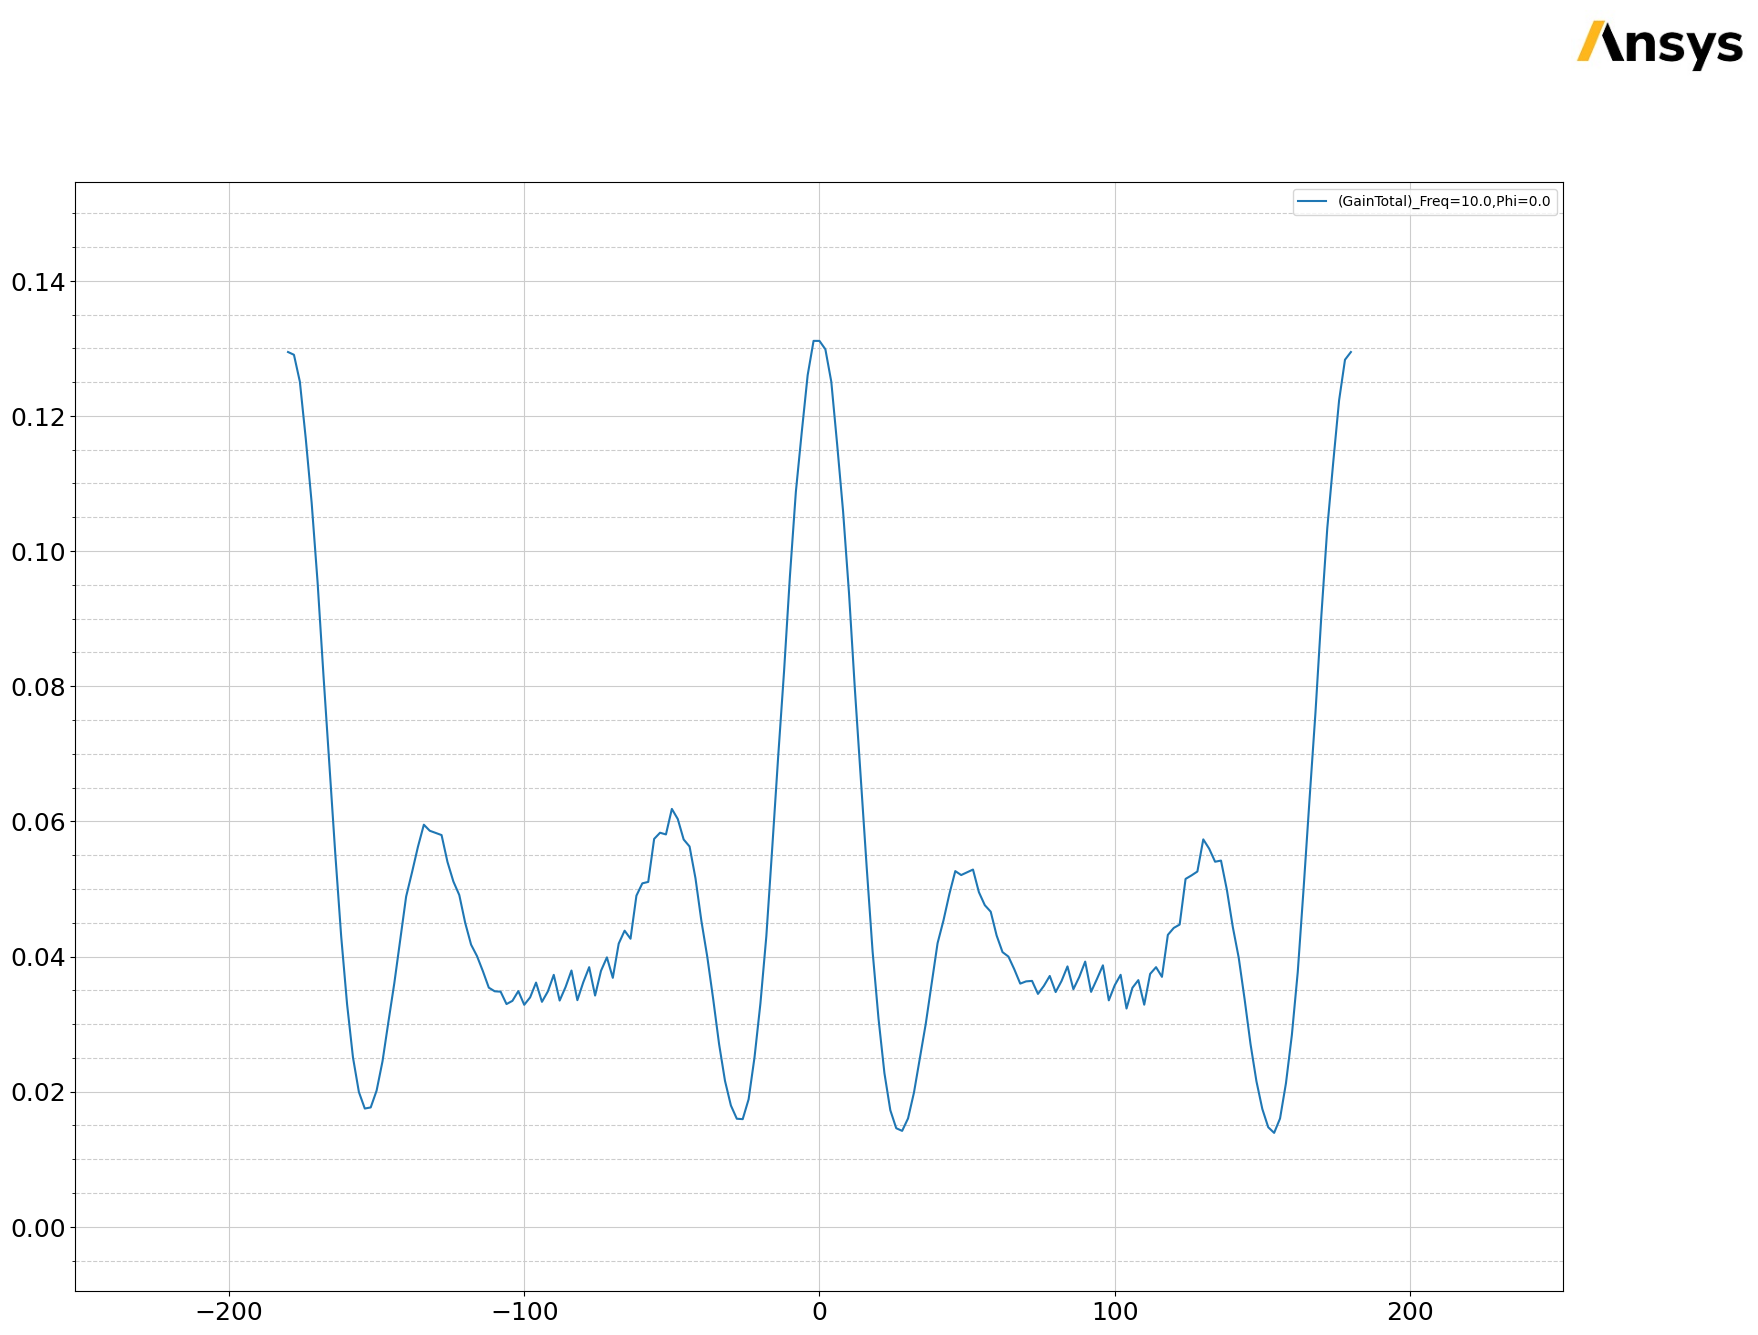

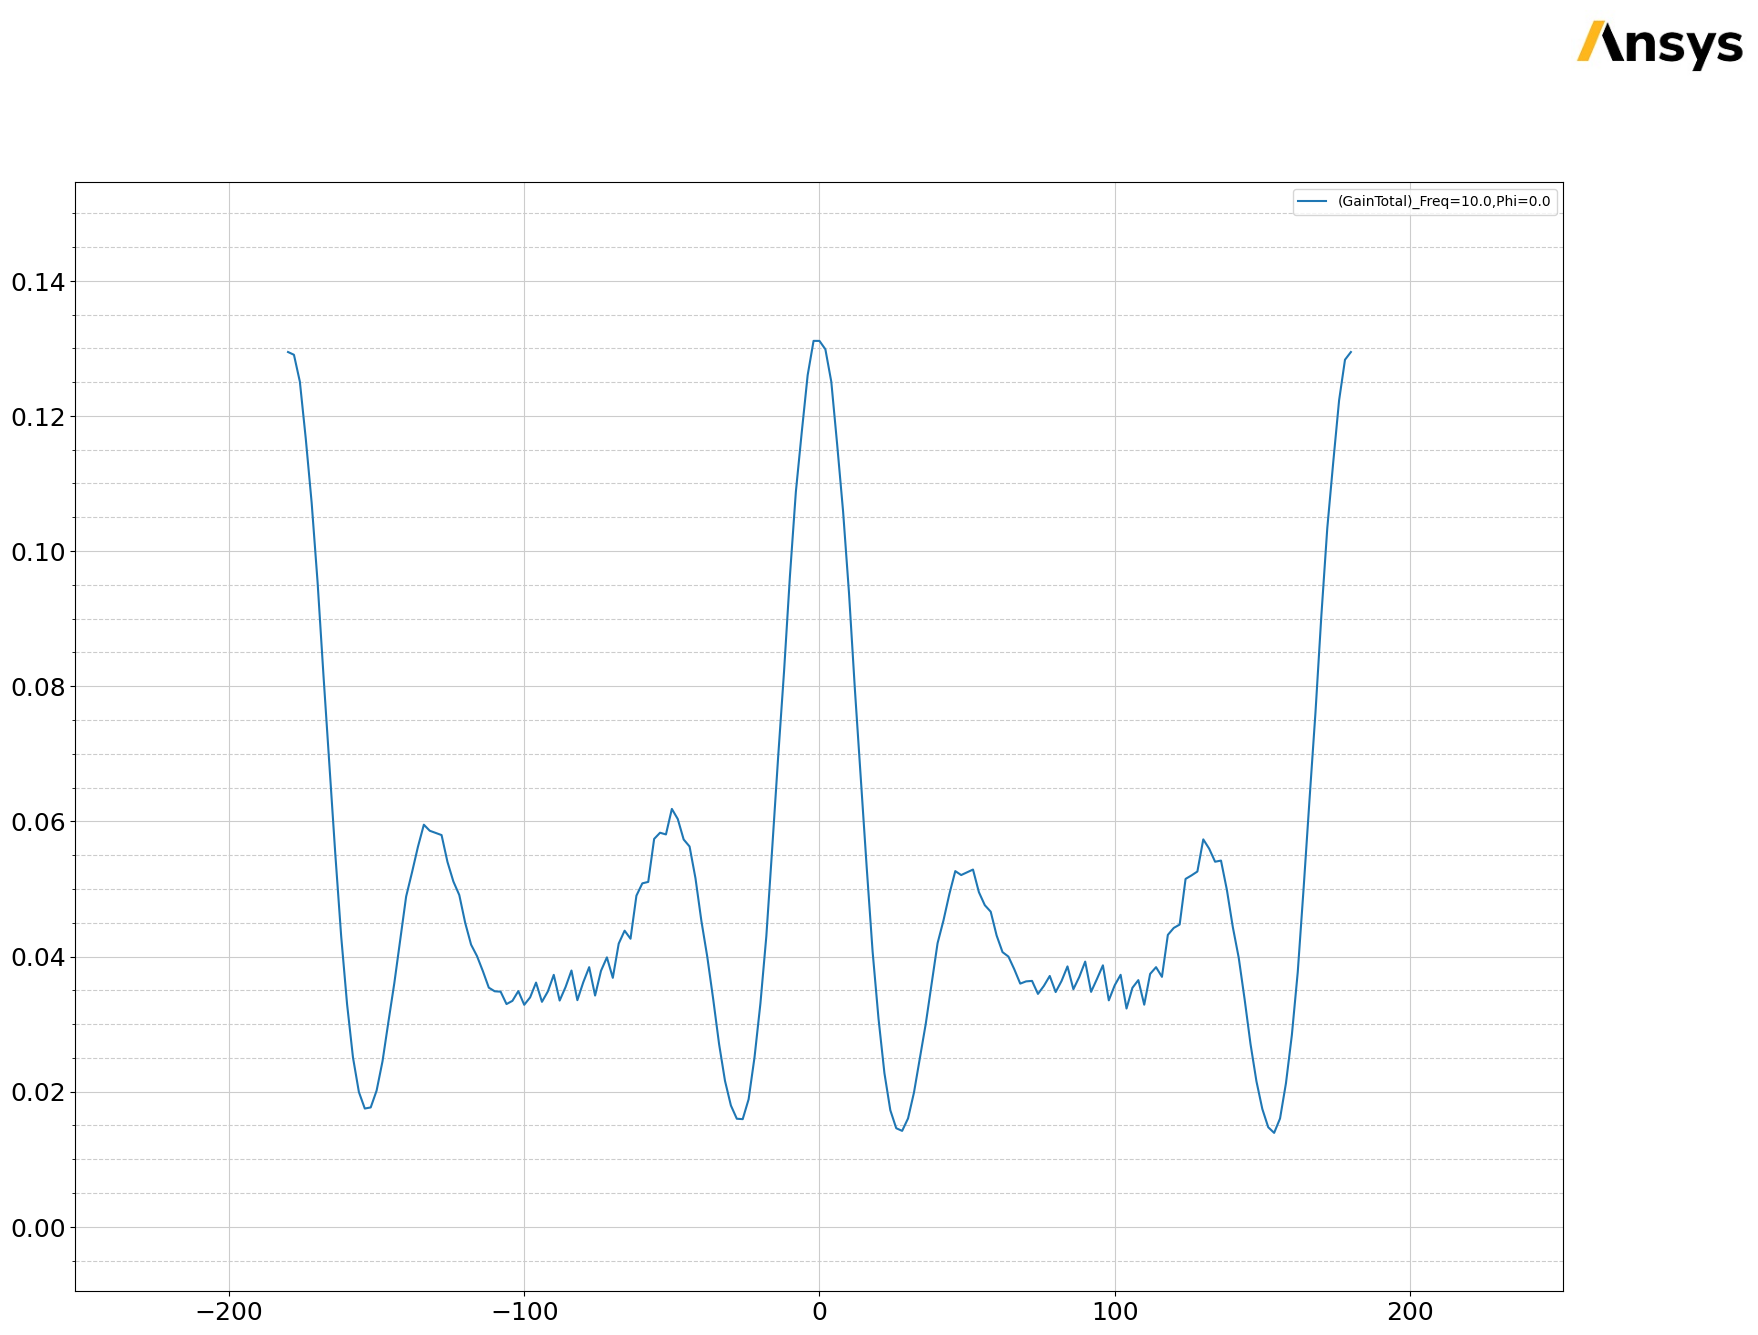

In [10]:
solution = target.post.get_solution_data(
    "GainTotal",
    target.nominal_adaptive,
    variations=variations,
    primary_sweep_variable="Theta",
    context="ATK_3D",
    report_category="Far Fields",
)
solution.plot()

## Release AEDT

Release AEDT and close the example.

In [11]:
target.save_project()
target.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project Cassegrain Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``. If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell removes all temporary files, including the project folder.

In [12]:
temp_folder.cleanup()